In [1]:
#Importamos las librerias 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#Cargamos el segundo DataFrame
dt = pd.read_csv('Datos_Toronto.csv')
dt = dt.drop(['Unnamed: 0'], axis=1)
dt.head(5)

C:\Users\Paulina\AppData\Local\Temp\ipykernel_5544\1296315536.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  dt = pd.read_csv('Datos_Toronto.csv')


source                                    name host_name  \
0  previous scrape                                   Marco   IsmaÃ«l   
1  previous scrape          Sunny Little Portugal Bachelor    Alyson   
2  previous scrape      $950 / 1br - LARGE Beautiful Attic   Stephen   
3  previous scrape                          Sarahâ house   Natalia   
4  previous scrape  81-05/ private room on the main floor.    Maggie   

   host_since    host_location host_response_time host_is_superhost  \
0  04/06/2016  Toronto, Canada         Sin tiempo                 f   
1  26/08/2016  Toronto, Canada         Sin tiempo                 f   
2  20/06/2013  Toronto, Canada         Sin tiempo                 f   
3  10/04/2014  Toronto, Canada       within a day                 f   
4  11/07/2017  Toronto, Canada         Sin tiempo                 f   

  host_listings_count  host_verifications host_identity_verified  ...  \
0                 1.0  ['email', 'phone']                      f  ...   
1                 1.0           ['phone']                      f  ...   
2                 1.0  ['email', 'phone']                      t  ...   
3                 5.0  ['email', 'phone']                      t  ...   
4                 9.0  ['email', 'phone']                      t  ...   

  number_of_reviews_ltm number_of_reviews_l30d review_scores_rating  \
0                   0.0                    0.0                  4.9   
1                   0.0                    0.0                  4.9   
2                   0.0                    0.0                  4.9   
3                   0.0                    0.0                  4.9   
4                   0.0                    0.0                  4.9   

  review_scores_accuracy review_scores_cleanliness review_scores_checkin  \
0                   4.75                       4.9                   4.9   
1                   4.75                       4.9                   4.9   
2                   4.75                       4.9                   4.9   
3                   4.75                       4.9                   4.9   
4                   4.75                       4.9                   4.9   

  review_scores_communication review_scores_location  review_scores_value  \
0                         5.0                    4.9                  4.7   
1                         5.0                    4.9                  4.7   
2                         5.0                    4.9                  4.7   
3                         5.0                    4.9                  4.7   
4                         5.0                    4.9                  4.7   

   reviews_per_month  
0               0.34  
1               0.34  
2               0.34  
3               0.34  
4               0.34  

[5 rows x 48 columns]

In [3]:
#Limitamos el DataFrame a las variables que vamos a usar 
f1 = dt.iloc[ : , [21, 6, 9, 11, 12, 17, 26, 27, 30, 42]]
f1

host_response_rate host_is_superhost host_identity_verified  \
0                    96.0                 f                      f   
1                    96.0                 f                      f   
2                    96.0                 f                      t   
3                   100.0                 f                      t   
4                    96.0                 f                      t   
...                   ...               ...                    ...   
21862               100.0                 t                      t   
21863                96.0                 f                      t   
21864               100.0                 f                      t   
21865               100.0                 t                      t   
21866                98.3                 f                      t   

                   property_type        room_type instant_bookable  \
0             Entire rental unit  Entire home/apt                f   
1             Entire rental unit  Entire home/apt                f   
2           Private room in loft     Private room                f   
3           Private room in home     Private room                f   
4           Private room in home     Private room                t   
...                          ...              ...              ...   
21862         Entire rental unit  Entire home/apt                f   
21863         Entire rental unit  Entire home/apt                f   
21864  Entire serviced apartment  Entire home/apt                t   
21865         Entire guest suite  Entire home/apt                t   
21866         Entire rental unit  Entire home/apt                f   

       accommodates  bathrooms   price  review_scores_cleanliness  
0               1.0      100.0  165.36                       4.90  
1               1.0      100.0  165.36                       4.90  
2               1.0      100.0  165.36                       4.90  
3               2.0      100.0  165.36                       4.90  
4               2.0      100.0  165.36                       4.90  
...             ...        ...     ...                        ...  
21862           1.0      100.0  165.36                       5.00  
21863           2.0      100.0  165.36                       5.00  
21864           5.0      100.0  165.36                       4.90  
21865           4.0      100.0  165.36                       4.89  
21866           3.0      100.0  165.36                       5.00  

[21867 rows x 10 columns]

In [4]:
#Caso especial para la variable "host_is_superhost"
f1['host_is_superhost'] = f1['host_is_superhost'].astype(str)
f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0.0, 't': 1})
f1['host_is_superhost'] = pd.to_numeric(f1['host_is_superhost'], errors='coerce').fillna(0).astype(float)

#Caso especial para la variable "host_identity_verified"
f1['host_identity_verified'] = f1['host_identity_verified'].astype(str)
f1['host_identity_verified'] = f1['host_identity_verified'].replace({'f': 0.0, 't': 1})
f1['host_identity_verified'] = pd.to_numeric(f1['host_identity_verified'], errors='coerce').fillna(0).astype(float)

C:\Users\Paulina\AppData\Local\Temp\ipykernel_5544\1373811180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1['host_is_superhost'] = f1['host_is_superhost'].astype(str)
C:\Users\Paulina\AppData\Local\Temp\ipykernel_5544\1373811180.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0.0, 't': 1})
C:\Users\Paulina\AppData\Local\Temp\ipykernel_5544\1373811180.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [5]:
#Convertimos los booleanos a numéricos
f1['instant_bookable'] = f1['instant_bookable'].replace({'f': 0, 't': 1})

#Convertimos los string a numéricos
from sklearn.preprocessing import LabelEncoder   #importamos libreria 

encoder = LabelEncoder()
f1['property_type'] = encoder.fit_transform(f1['property_type'])
f1['property_type'] = f1['property_type'].astype(float)

#Hacemos un filtro para la variable "room_type"
f1['room_type'] = f1['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})

C:\Users\Paulina\AppData\Local\Temp\ipykernel_5544\1611080944.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  f1['instant_bookable'] = f1['instant_bookable'].replace({'f': 0, 't': 1})
C:\Users\Paulina\AppData\Local\Temp\ipykernel_5544\1611080944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1['instant_bookable'] = f1['instant_bookable'].replace({'f': 0, 't': 1})
C:\Users\Paulina\AppData\Local\Temp\ipykernel_5544\1611080944.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [ ]:
#Hacemos un DataFrame para cada categoria 
ft_1 = f1[(f1["room_type"] == 1)]              #ft_1 = Entire home/apt
ft_2 = f1[(f1["room_type"] == 2)]              #ft_2 = Private room
ft_3 = f1[(f1["room_type"] == 3)]              #ft_3 = Shared room
ft_4 = f1[(f1["room_type"] == 4)]              #ft_4 = Hotel room

-------------------------------DataFrame: Entire home/apt-------------------------------

In [7]:
#Revisamos la información del primer DataFrame
ft_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14374 entries, 0 to 21866
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_response_rate         14374 non-null  float64
 1   host_is_superhost          14374 non-null  float64
 2   host_identity_verified     14374 non-null  float64
 3   property_type              14374 non-null  float64
 4   room_type                  14374 non-null  int64  
 5   instant_bookable           14374 non-null  int64  
 6   accommodates               14374 non-null  float64
 7   bathrooms                  14374 non-null  float64
 8   price                      14374 non-null  float64
 9   review_scores_cleanliness  14374 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 1.2 MB


Grafico 1:

<Axes: xlabel='room_type', ylabel='price'>

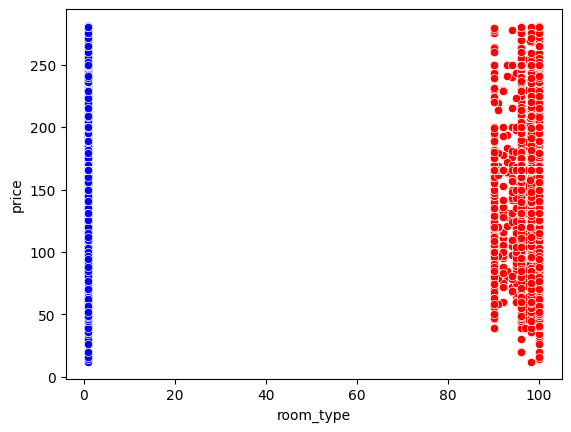

In [8]:
from turtle import color 

#Mostramos el grafico 
sns.scatterplot(x='room_type', y='price', color='blue', data=ft_1)
sns.scatterplot(x='host_response_rate', y='price', color='red', data=ft_1)

Grafico 2:

<Axes: xlabel='room_type', ylabel='price'>

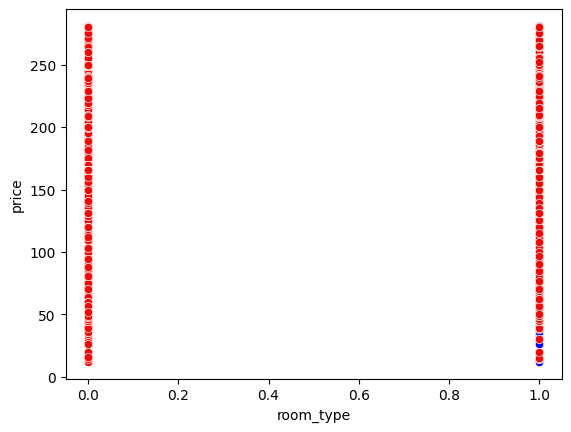

In [9]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=ft_1)
sns.scatterplot(x='host_is_superhost', y='price', color='red', data=ft_1)

Grafico 3:

<Axes: xlabel='room_type', ylabel='price'>

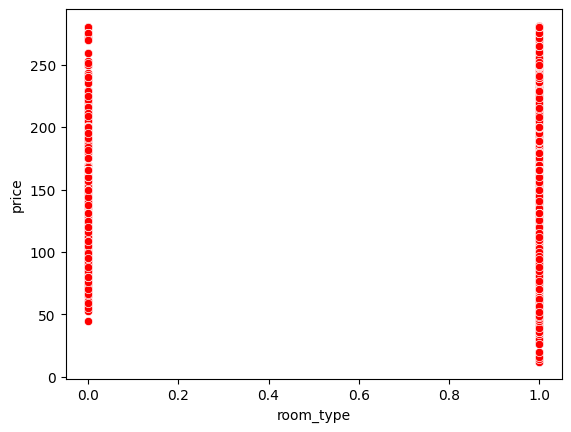

In [10]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=ft_1)
sns.scatterplot(x='host_identity_verified', y='price', color='red', data=ft_1)

Grafico 4:

<Axes: xlabel='room_type', ylabel='price'>

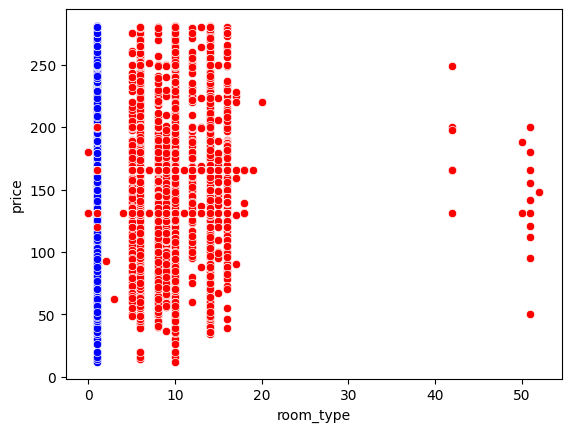

In [11]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=ft_1)
sns.scatterplot(x='property_type', y='price', color='red', data=ft_1)

Grafico 5:

<Axes: xlabel='room_type', ylabel='price'>

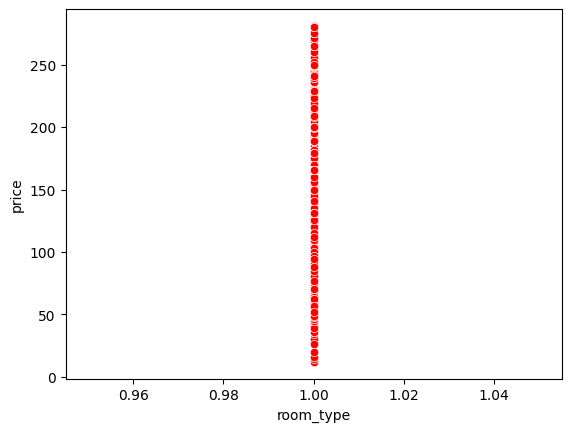

In [12]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=ft_1)
sns.scatterplot(x='room_type', y='price', color='red', data=ft_1)

Grafico 6:

<Axes: xlabel='room_type', ylabel='price'>

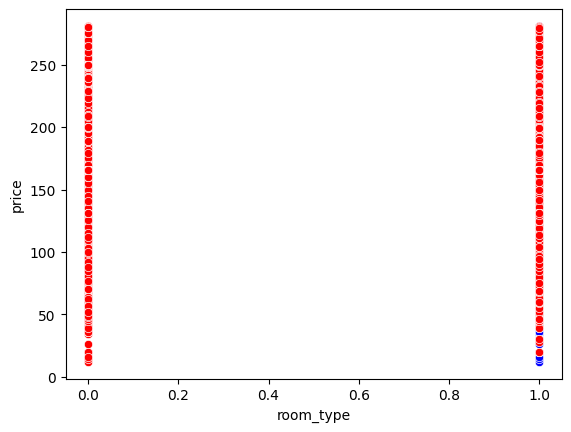

In [13]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=ft_1)
sns.scatterplot(x='instant_bookable', y='price', color='red', data=ft_1)

Grafico 7:

<Axes: xlabel='room_type', ylabel='price'>

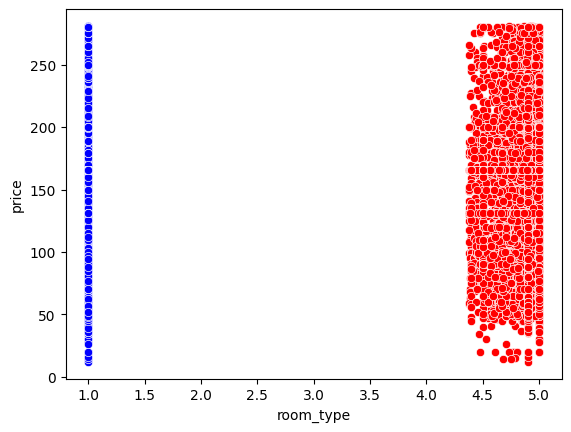

In [14]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=ft_1)
sns.scatterplot(x='review_scores_cleanliness', y='price', color='red', data=ft_1)

Grafico 8:

<Axes: xlabel='room_type', ylabel='accommodates'>

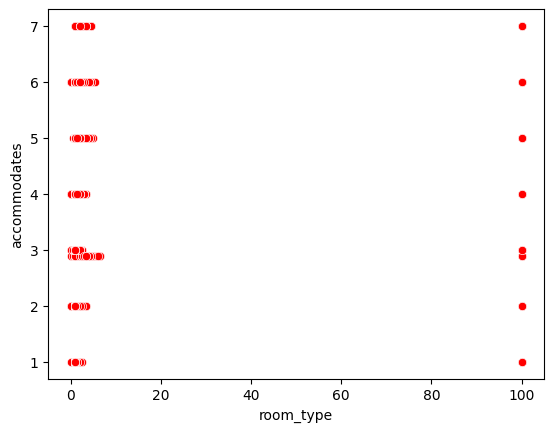

In [15]:
from turtle import color 

sns.scatterplot(x='room_type', y='accommodates', color='blue', data=ft_1)
sns.scatterplot(x='bathrooms', y='accommodates', color='red', data=ft_1)

Declaramos las variables dependientes e independientes

In [16]:
#declaramos las variables dependientes e independientes para la regresión lineal
Var_Indep_T = ft_1[['host_response_rate']]
Var_Dep_T = ft_1['price']

In [17]:
#declaración de las variables independientes que se van a comparar con el precio 
Var_Indep_T2 = ft_1[['host_is_superhost']]
Var_Indep_T3 = ft_1[['room_type']]
Var_Indep_T4 = ft_1[['host_identity_verified']]
Var_Indep_T5 = ft_1[['property_type']]
Var_Indep_T6 = ft_1[['instant_bookable']]
Var_Indep_T7 = ft_1[['review_scores_cleanliness']]

In [44]:
#variables accommodates vs bathrooms
Var_Indep_T8 = ft_1[['bathrooms']]
Var_Dep_T2 = ft_1['accommodates']

Definimos el modelo 

In [45]:
#se define model como función de regresión lineal 
from sklearn.linear_model import LinearRegression 

model_T = LinearRegression()
model_T2 = LinearRegression()
model_T3 = LinearRegression()
model_T4 = LinearRegression()
model_T5 = LinearRegression()
model_T6 = LinearRegression()
model_T7 = LinearRegression()
model_T8 = LinearRegression()

In [46]:
#ajustamos el modelo con las variables antes declaradas
model_T.fit(X = Var_Indep_T, y = Var_Dep_T)
model_T2.fit(X = Var_Indep_T2, y = Var_Dep_T)
model_T3.fit(X = Var_Indep_T3, y = Var_Dep_T)
model_T4.fit(X = Var_Indep_T4, y = Var_Dep_T)
model_T5.fit(X = Var_Indep_T5, y = Var_Dep_T)
model_T6.fit(X = Var_Indep_T6, y = Var_Dep_T)
model_T7.fit(X = Var_Indep_T7, y = Var_Dep_T)
model_T8.fit(X = Var_Indep_T8, y = Var_Dep_T2)

LinearRegression()

Obtenemos el coeficiente para el modelo 1

In [21]:
#verificamos los coeficientes obtenidos para el modelo ajustado 1 
model_T.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-2.07676796]),
 'rank_': 1,
 'singular_': array([265.18760662]),
 'intercept_': 351.91219432464857}

In [22]:
#predecimos valores para el modelo matemático y=-2.07676796 + 351.91219432464857
y_pred_T = model_T.predict(X = ft_1[['host_response_rate']])
y_pred_T

array([152.54246971, 152.54246971, 152.54246971, ..., 144.23539785,
       144.23539785, 147.76590339])

In [23]:
#insertamos la columna de predicciones en el DataFrame 
ft_1.insert(0, 'Predicciones_1', y_pred_T)
ft_1

Predicciones_1  host_response_rate  host_is_superhost  \
0          152.542470                96.0                0.0   
1          152.542470                96.0                0.0   
5          152.542470                96.0                0.0   
14         152.542470                96.0                0.0   
15         152.542470                96.0                0.0   
...               ...                 ...                ...   
21862      144.235398               100.0                1.0   
21863      152.542470                96.0                0.0   
21864      144.235398               100.0                0.0   
21865      144.235398               100.0                1.0   
21866      147.765903                98.3                0.0   

       host_identity_verified  property_type  room_type  instant_bookable  \
0                         0.0           14.0          1                 0   
1                         0.0           14.0          1                 0   
5                         1.0           14.0          1                 1   
14                        1.0           10.0          1                 0   
15                        1.0           14.0          1                 1   
...                       ...            ...        ...               ...   
21862                     1.0           14.0          1                 0   
21863                     1.0           14.0          1                 0   
21864                     1.0           15.0          1                 1   
21865                     1.0            8.0          1                 1   
21866                     1.0           14.0          1                 0   

       accommodates  bathrooms   price  review_scores_cleanliness  
0               1.0      100.0  165.36                       4.90  
1               1.0      100.0  165.36                       4.90  
5               6.0      100.0  165.36                       4.90  
14              4.0        1.0  125.00                       5.00  
15              2.0        1.0  180.00                       4.90  
...             ...        ...     ...                        ...  
21862           1.0      100.0  165.36                       5.00  
21863           2.0      100.0  165.36                       5.00  
21864           5.0      100.0  165.36                       4.90  
21865           4.0      100.0  165.36                       4.89  
21866           3.0      100.0  165.36                       5.00  

[14374 rows x 11 columns]

Obtenemos el coeficiente para el modelo 2

In [24]:
#verificamos los coeficientes obtenidos para el modelo ajustado 2
model_T2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-3.42376507]),
 'rank_': 1,
 'singular_': array([56.72809783]),
 'intercept_': 148.96305783385915}

In [ ]:
#predecimos valores para el modelo matemático y=-3.42376507 + 148.96305783385915
y_pred_T2 = model_T2.predict(X = ft_1[['host_is_superhost']])
y_pred_T2

array([148.96305783, 148.96305783, 148.96305783, ..., 148.96305783,
       145.53929276, 148.96305783])

In [26]:
#insertamos la columna de predicciones en el DataFrame 
ft_1.insert(1, 'Predicciones_2', y_pred_T2)
ft_1

Predicciones_1  Predicciones_2  host_response_rate  host_is_superhost  \
0          152.542470      148.963058                96.0                0.0   
1          152.542470      148.963058                96.0                0.0   
5          152.542470      148.963058                96.0                0.0   
14         152.542470      148.963058                96.0                0.0   
15         152.542470      148.963058                96.0                0.0   
...               ...             ...                 ...                ...   
21862      144.235398      145.539293               100.0                1.0   
21863      152.542470      148.963058                96.0                0.0   
21864      144.235398      148.963058               100.0                0.0   
21865      144.235398      145.539293               100.0                1.0   
21866      147.765903      148.963058                98.3                0.0   

       host_identity_verified  property_type  room_type  instant_bookable  \
0                         0.0           14.0          1                 0   
1                         0.0           14.0          1                 0   
5                         1.0           14.0          1                 1   
14                        1.0           10.0          1                 0   
15                        1.0           14.0          1                 1   
...                       ...            ...        ...               ...   
21862                     1.0           14.0          1                 0   
21863                     1.0           14.0          1                 0   
21864                     1.0           15.0          1                 1   
21865                     1.0            8.0          1                 1   
21866                     1.0           14.0          1                 0   

       accommodates  bathrooms   price  review_scores_cleanliness  
0               1.0      100.0  165.36                       4.90  
1               1.0      100.0  165.36                       4.90  
5               6.0      100.0  165.36                       4.90  
14              4.0        1.0  125.00                       5.00  
15              2.0        1.0  180.00                       4.90  
...             ...        ...     ...                        ...  
21862           1.0      100.0  165.36                       5.00  
21863           2.0      100.0  165.36                       5.00  
21864           5.0      100.0  165.36                       4.90  
21865           4.0      100.0  165.36                       4.89  
21866           3.0      100.0  165.36                       5.00  

[14374 rows x 12 columns]

Obtenemos el coeficiente para el modelo 3

In [27]:
#verificamos los coeficientes obtenidos para el modelo ajustado 3
model_T3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': 147.8044942256853}

In [ ]:
#predecimos valores para el modelo matemático y=0 + 147.8044942256853
y_pred_T3 = model_T3.predict(X = ft_1[['room_type']])
y_pred_T3

array([147.80449423, 147.80449423, 147.80449423, ..., 147.80449423,
       147.80449423, 147.80449423])

In [29]:
#insertamos la columna de predicciones en el DataFrame 
ft_1.insert(2, 'Predicciones_3', y_pred_T3)
ft_1

Predicciones_1  Predicciones_2  Predicciones_3  host_response_rate  \
0          152.542470      148.963058      147.804494                96.0   
1          152.542470      148.963058      147.804494                96.0   
5          152.542470      148.963058      147.804494                96.0   
14         152.542470      148.963058      147.804494                96.0   
15         152.542470      148.963058      147.804494                96.0   
...               ...             ...             ...                 ...   
21862      144.235398      145.539293      147.804494               100.0   
21863      152.542470      148.963058      147.804494                96.0   
21864      144.235398      148.963058      147.804494               100.0   
21865      144.235398      145.539293      147.804494               100.0   
21866      147.765903      148.963058      147.804494                98.3   

       host_is_superhost  host_identity_verified  property_type  room_type  \
0                    0.0                     0.0           14.0          1   
1                    0.0                     0.0           14.0          1   
5                    0.0                     1.0           14.0          1   
14                   0.0                     1.0           10.0          1   
15                   0.0                     1.0           14.0          1   
...                  ...                     ...            ...        ...   
21862                1.0                     1.0           14.0          1   
21863                0.0                     1.0           14.0          1   
21864                0.0                     1.0           15.0          1   
21865                1.0                     1.0            8.0          1   
21866                0.0                     1.0           14.0          1   

       instant_bookable  accommodates  bathrooms   price  \
0                     0           1.0      100.0  165.36   
1                     0           1.0      100.0  165.36   
5                     1           6.0      100.0  165.36   
14                    0           4.0        1.0  125.00   
15                    1           2.0        1.0  180.00   
...                 ...           ...        ...     ...   
21862                 0           1.0      100.0  165.36   
21863                 0           2.0      100.0  165.36   
21864                 1           5.0      100.0  165.36   
21865                 1           4.0      100.0  165.36   
21866                 0           3.0      100.0  165.36   

       review_scores_cleanliness  
0                           4.90  
1                           4.90  
5                           4.90  
14                          5.00  
15                          4.90  
...                          ...  
21862                       5.00  
21863                       5.00  
21864                       4.90  
21865                       4.89  
21866                       5.00  

[14374 rows x 13 columns]

Obtenemos el coeficiente para el modelo 4

In [30]:
#verificamos los coeficientes obtenidos para el modelo ajustado 4
model_T4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-8.71937775]),
 'rank_': 1,
 'singular_': array([34.02632003]),
 'intercept_': 155.75348031496054}

In [ ]:
#predecimos valores para el modelo matemático y=-8.71937775 + 155.75348031496054
y_pred_T4 = model_T4.predict(X = ft_1[['host_identity_verified']])
y_pred_T4

array([155.75348031, 155.75348031, 147.03410256, ..., 147.03410256,
       147.03410256, 147.03410256])

In [32]:
#insertamos la columna de predicciones en el DataFrame 
ft_1.insert(3, 'Predicciones_4', y_pred_T4)
ft_1

Predicciones_1  Predicciones_2  Predicciones_3  Predicciones_4  \
0          152.542470      148.963058      147.804494      155.753480   
1          152.542470      148.963058      147.804494      155.753480   
5          152.542470      148.963058      147.804494      147.034103   
14         152.542470      148.963058      147.804494      147.034103   
15         152.542470      148.963058      147.804494      147.034103   
...               ...             ...             ...             ...   
21862      144.235398      145.539293      147.804494      147.034103   
21863      152.542470      148.963058      147.804494      147.034103   
21864      144.235398      148.963058      147.804494      147.034103   
21865      144.235398      145.539293      147.804494      147.034103   
21866      147.765903      148.963058      147.804494      147.034103   

       host_response_rate  host_is_superhost  host_identity_verified  \
0                    96.0                0.0                     0.0   
1                    96.0                0.0                     0.0   
5                    96.0                0.0                     1.0   
14                   96.0                0.0                     1.0   
15                   96.0                0.0                     1.0   
...                   ...                ...                     ...   
21862               100.0                1.0                     1.0   
21863                96.0                0.0                     1.0   
21864               100.0                0.0                     1.0   
21865               100.0                1.0                     1.0   
21866                98.3                0.0                     1.0   

       property_type  room_type  instant_bookable  accommodates  bathrooms  \
0               14.0          1                 0           1.0      100.0   
1               14.0          1                 0           1.0      100.0   
5               14.0          1                 1           6.0      100.0   
14              10.0          1                 0           4.0        1.0   
15              14.0          1                 1           2.0        1.0   
...              ...        ...               ...           ...        ...   
21862           14.0          1                 0           1.0      100.0   
21863           14.0          1                 0           2.0      100.0   
21864           15.0          1                 1           5.0      100.0   
21865            8.0          1                 1           4.0      100.0   
21866           14.0          1                 0           3.0      100.0   

        price  review_scores_cleanliness  
0      165.36                       4.90  
1      165.36                       4.90  
5      165.36                       4.90  
14     125.00                       5.00  
15     180.00                       4.90  
...       ...                        ...  
21862  165.36                       5.00  
21863  165.36                       5.00  
21864  165.36                       4.90  
21865  165.36                       4.89  
21866  165.36                       5.00  

[14374 rows x 14 columns]

Obtenemos el coeficiente para el modelo 5

In [33]:
#verificamos los coeficientes obtenidos para el modelo ajustado 5
model_T5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.56064487]),
 'rank_': 1,
 'singular_': array([445.8718014]),
 'intercept_': 153.74536408524727}

In [34]:
#predecimos valores para el modelo matemático y=-0.56064487 + 153.74536408524727
y_pred_T5 = model_T5.predict(X = ft_1[['property_type']])
y_pred_T5

array([145.89633585, 145.89633585, 145.89633585, ..., 145.33569097,
       149.26020509, 145.89633585])

In [35]:
#insertamos la columna de predicciones en el DataFrame 
ft_1.insert(4, 'Predicciones_5', y_pred_T5)
ft_1

Predicciones_1  Predicciones_2  Predicciones_3  Predicciones_4  \
0          152.542470      148.963058      147.804494      155.753480   
1          152.542470      148.963058      147.804494      155.753480   
5          152.542470      148.963058      147.804494      147.034103   
14         152.542470      148.963058      147.804494      147.034103   
15         152.542470      148.963058      147.804494      147.034103   
...               ...             ...             ...             ...   
21862      144.235398      145.539293      147.804494      147.034103   
21863      152.542470      148.963058      147.804494      147.034103   
21864      144.235398      148.963058      147.804494      147.034103   
21865      144.235398      145.539293      147.804494      147.034103   
21866      147.765903      148.963058      147.804494      147.034103   

       Predicciones_5  host_response_rate  host_is_superhost  \
0          145.896336                96.0                0.0   
1          145.896336                96.0                0.0   
5          145.896336                96.0                0.0   
14         148.138915                96.0                0.0   
15         145.896336                96.0                0.0   
...               ...                 ...                ...   
21862      145.896336               100.0                1.0   
21863      145.896336                96.0                0.0   
21864      145.335691               100.0                0.0   
21865      149.260205               100.0                1.0   
21866      145.896336                98.3                0.0   

       host_identity_verified  property_type  room_type  instant_bookable  \
0                         0.0           14.0          1                 0   
1                         0.0           14.0          1                 0   
5                         1.0           14.0          1                 1   
14                        1.0           10.0          1                 0   
15                        1.0           14.0          1                 1   
...                       ...            ...        ...               ...   
21862                     1.0           14.0          1                 0   
21863                     1.0           14.0          1                 0   
21864                     1.0           15.0          1                 1   
21865                     1.0            8.0          1                 1   
21866                     1.0           14.0          1                 0   

       accommodates  bathrooms   price  review_scores_cleanliness  
0               1.0      100.0  165.36                       4.90  
1               1.0      100.0  165.36                       4.90  
5               6.0      100.0  165.36                       4.90  
14              4.0        1.0  125.00                       5.00  
15              2.0        1.0  180.00                       4.90  
...             ...        ...     ...                        ...  
21862           1.0      100.0  165.36                       5.00  
21863           2.0      100.0  165.36                       5.00  
21864           5.0      100.0  165.36                       4.90  
21865           4.0      100.0  165.36                       4.89  
21866           3.0      100.0  165.36                       5.00  

[14374 rows x 15 columns]

Obtenemos el coeficiente para el modelo 6

In [36]:
#verificamos los coeficientes obtenidos para el modelo ajustado 6 
model_T6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-2.04562111]),
 'rank_': 1,
 'singular_': array([48.59634383]),
 'intercept_': 148.22844756472142}

In [37]:
#predecimos valores para el modelo matemático y=-2.04562111 + 148.22844756472142
y_pred_T6 = model_T6.predict(X = ft_1[['instant_bookable']])
y_pred_T6

array([148.22844756, 148.22844756, 146.18282645, ..., 146.18282645,
       146.18282645, 148.22844756])

In [38]:
#insertamos la columna de predicciones en el DataFrame 
ft_1.insert(5, 'Predicciones_6', y_pred_T6)
ft_1

Predicciones_1  Predicciones_2  Predicciones_3  Predicciones_4  \
0          152.542470      148.963058      147.804494      155.753480   
1          152.542470      148.963058      147.804494      155.753480   
5          152.542470      148.963058      147.804494      147.034103   
14         152.542470      148.963058      147.804494      147.034103   
15         152.542470      148.963058      147.804494      147.034103   
...               ...             ...             ...             ...   
21862      144.235398      145.539293      147.804494      147.034103   
21863      152.542470      148.963058      147.804494      147.034103   
21864      144.235398      148.963058      147.804494      147.034103   
21865      144.235398      145.539293      147.804494      147.034103   
21866      147.765903      148.963058      147.804494      147.034103   

       Predicciones_5  Predicciones_6  host_response_rate  host_is_superhost  \
0          145.896336      148.228448                96.0                0.0   
1          145.896336      148.228448                96.0                0.0   
5          145.896336      146.182826                96.0                0.0   
14         148.138915      148.228448                96.0                0.0   
15         145.896336      146.182826                96.0                0.0   
...               ...             ...                 ...                ...   
21862      145.896336      148.228448               100.0                1.0   
21863      145.896336      148.228448                96.0                0.0   
21864      145.335691      146.182826               100.0                0.0   
21865      149.260205      146.182826               100.0                1.0   
21866      145.896336      148.228448                98.3                0.0   

       host_identity_verified  property_type  room_type  instant_bookable  \
0                         0.0           14.0          1                 0   
1                         0.0           14.0          1                 0   
5                         1.0           14.0          1                 1   
14                        1.0           10.0          1                 0   
15                        1.0           14.0          1                 1   
...                       ...            ...        ...               ...   
21862                     1.0           14.0          1                 0   
21863                     1.0           14.0          1                 0   
21864                     1.0           15.0          1                 1   
21865                     1.0            8.0          1                 1   
21866                     1.0           14.0          1                 0   

       accommodates  bathrooms   price  review_scores_cleanliness  
0               1.0      100.0  165.36                       4.90  
1               1.0      100.0  165.36                       4.90  
5               6.0      100.0  165.36                       4.90  
14              4.0        1.0  125.00                       5.00  
15              2.0        1.0  180.00                       4.90  
...             ...        ...     ...                        ...  
21862           1.0      100.0  165.36                       5.00  
21863           2.0      100.0  165.36                       5.00  
21864           5.0      100.0  165.36                       4.90  
21865           4.0      100.0  165.36                       4.89  
21866           3.0      100.0  165.36                       5.00  

[14374 rows x 16 columns]

Obtenemos el coeficiente para el modelo 7

In [39]:
#verificamos los coeficientes obtenidos para el modelo ajustado 7
model_T7.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([8.40415349]),
 'rank_': 1,
 'singular_': array([16.6394206]),
 'intercept_': 106.90892681344783}

In [40]:
#predecimos valores para el modelo matemático y=8.40415349 + 106.90892681344783
y_pred_T7= model_T7.predict(X = ft_1[['review_scores_cleanliness']])
y_pred_T7

array([148.08927891, 148.08927891, 148.08927891, ..., 148.08927891,
       148.00523738, 148.92969426])

In [41]:
#insertamos la columna de predicciones en el DataFrame 
ft_1.insert(6, 'Predicciones_7', y_pred_T7)
ft_1

Predicciones_1  Predicciones_2  Predicciones_3  Predicciones_4  \
0          152.542470      148.963058      147.804494      155.753480   
1          152.542470      148.963058      147.804494      155.753480   
5          152.542470      148.963058      147.804494      147.034103   
14         152.542470      148.963058      147.804494      147.034103   
15         152.542470      148.963058      147.804494      147.034103   
...               ...             ...             ...             ...   
21862      144.235398      145.539293      147.804494      147.034103   
21863      152.542470      148.963058      147.804494      147.034103   
21864      144.235398      148.963058      147.804494      147.034103   
21865      144.235398      145.539293      147.804494      147.034103   
21866      147.765903      148.963058      147.804494      147.034103   

       Predicciones_5  Predicciones_6  Predicciones_7  host_response_rate  \
0          145.896336      148.228448      148.089279                96.0   
1          145.896336      148.228448      148.089279                96.0   
5          145.896336      146.182826      148.089279                96.0   
14         148.138915      148.228448      148.929694                96.0   
15         145.896336      146.182826      148.089279                96.0   
...               ...             ...             ...                 ...   
21862      145.896336      148.228448      148.929694               100.0   
21863      145.896336      148.228448      148.929694                96.0   
21864      145.335691      146.182826      148.089279               100.0   
21865      149.260205      146.182826      148.005237               100.0   
21866      145.896336      148.228448      148.929694                98.3   

       host_is_superhost  host_identity_verified  property_type  room_type  \
0                    0.0                     0.0           14.0          1   
1                    0.0                     0.0           14.0          1   
5                    0.0                     1.0           14.0          1   
14                   0.0                     1.0           10.0          1   
15                   0.0                     1.0           14.0          1   
...                  ...                     ...            ...        ...   
21862                1.0                     1.0           14.0          1   
21863                0.0                     1.0           14.0          1   
21864                0.0                     1.0           15.0          1   
21865                1.0                     1.0            8.0          1   
21866                0.0                     1.0           14.0          1   

       instant_bookable  accommodates  bathrooms   price  \
0                     0           1.0      100.0  165.36   
1                     0           1.0      100.0  165.36   
5                     1           6.0      100.0  165.36   
14                    0           4.0        1.0  125.00   
15                    1           2.0        1.0  180.00   
...                 ...           ...        ...     ...   
21862                 0           1.0      100.0  165.36   
21863                 0           2.0      100.0  165.36   
21864                 1           5.0      100.0  165.36   
21865                 1           4.0      100.0  165.36   
21866                 0           3.0      100.0  165.36   

       review_scores_cleanliness  
0                           4.90  
1                           4.90  
5                           4.90  
14                          5.00  
15                          4.90  
...                          ...  
21862                       5.00  
21863                       5.00  
21864                       4.90  
21865                       4.89  
21866                       5.00  

[14374 rows x 17 columns]

Obtenemos el coeficiente para el modelo 8

In [48]:
#verificamos los coeficientes obtenidos para el modelo ajustado 8
model_T8.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.00144559]),
 'rank_': 1,
 'singular_': array([5186.19853493]),
 'intercept_': 3.4855792715780174}

In [47]:
#predecimos valores para el modelo matemático y=-0.00144559 + 3.48557927
y_pred_T8 = model_T8.predict(X = ft_1[['bathrooms']])
y_pred_T8

array([3.34102038, 3.34102038, 3.34102038, ..., 3.34102038, 3.34102038,
       3.34102038])

In [49]:
#insertamos la columna de predicciones en el DataFrame 
ft_1.insert(7, 'Predicciones_8', y_pred_T8)
ft_1

Predicciones_1  Predicciones_2  Predicciones_3  Predicciones_4  \
0          152.542470      148.963058      147.804494      155.753480   
1          152.542470      148.963058      147.804494      155.753480   
5          152.542470      148.963058      147.804494      147.034103   
14         152.542470      148.963058      147.804494      147.034103   
15         152.542470      148.963058      147.804494      147.034103   
...               ...             ...             ...             ...   
21862      144.235398      145.539293      147.804494      147.034103   
21863      152.542470      148.963058      147.804494      147.034103   
21864      144.235398      148.963058      147.804494      147.034103   
21865      144.235398      145.539293      147.804494      147.034103   
21866      147.765903      148.963058      147.804494      147.034103   

       Predicciones_5  Predicciones_6  Predicciones_7  Predicciones_8  \
0          145.896336      148.228448      148.089279        3.341020   
1          145.896336      148.228448      148.089279        3.341020   
5          145.896336      146.182826      148.089279        3.341020   
14         148.138915      148.228448      148.929694        3.484134   
15         145.896336      146.182826      148.089279        3.484134   
...               ...             ...             ...             ...   
21862      145.896336      148.228448      148.929694        3.341020   
21863      145.896336      148.228448      148.929694        3.341020   
21864      145.335691      146.182826      148.089279        3.341020   
21865      149.260205      146.182826      148.005237        3.341020   
21866      145.896336      148.228448      148.929694        3.341020   

       host_response_rate  host_is_superhost  host_identity_verified  \
0                    96.0                0.0                     0.0   
1                    96.0                0.0                     0.0   
5                    96.0                0.0                     1.0   
14                   96.0                0.0                     1.0   
15                   96.0                0.0                     1.0   
...                   ...                ...                     ...   
21862               100.0                1.0                     1.0   
21863                96.0                0.0                     1.0   
21864               100.0                0.0                     1.0   
21865               100.0                1.0                     1.0   
21866                98.3                0.0                     1.0   

       property_type  room_type  instant_bookable  accommodates  bathrooms  \
0               14.0          1                 0           1.0      100.0   
1               14.0          1                 0           1.0      100.0   
5               14.0          1                 1           6.0      100.0   
14              10.0          1                 0           4.0        1.0   
15              14.0          1                 1           2.0        1.0   
...              ...        ...               ...           ...        ...   
21862           14.0          1                 0           1.0      100.0   
21863           14.0          1                 0           2.0      100.0   
21864           15.0          1                 1           5.0      100.0   
21865            8.0          1                 1           4.0      100.0   
21866           14.0          1                 0           3.0      100.0   

        price  review_scores_cleanliness  
0      165.36                       4.90  
1      165.36                       4.90  
5      165.36                       4.90  
14     125.00                       5.00  
15     180.00                       4.90  
...       ...                        ...  
21862  165.36                       5.00  
21863  165.36                       5.00  
21864  165.36                       4.90  
21865  165.36        

Graficas comparativas 

Grafico 1:

<Axes: xlabel='host_response_rate', ylabel='price'>

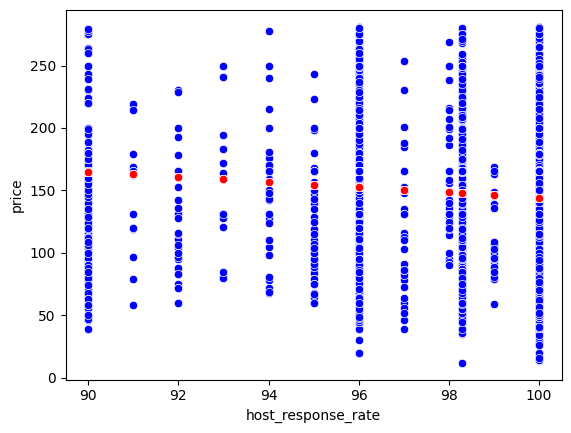

In [50]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='host_response_rate', y='price', color='blue', data=ft_1)
sns.scatterplot(x='host_response_rate', y='Predicciones_1', color='red', data=ft_1)

Grafico 2:

<Axes: xlabel='host_is_superhost', ylabel='price'>

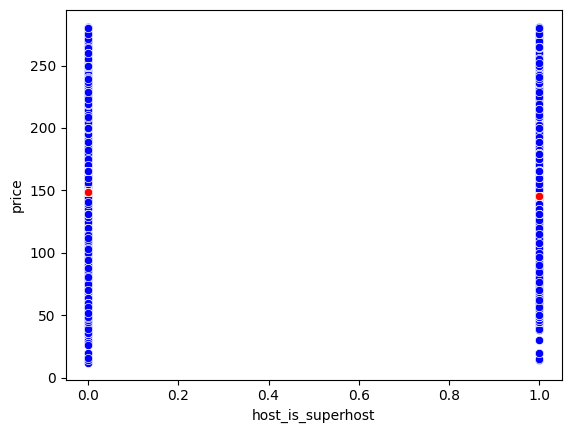

In [51]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='host_is_superhost', y='price', color='blue', data=ft_1)
sns.scatterplot(x='host_is_superhost', y='Predicciones_2', color='red', data=ft_1)

Grafico 3:

<Axes: xlabel='room_type', ylabel='price'>

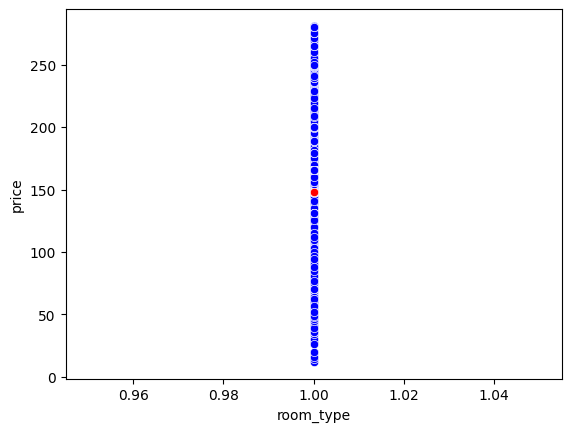

In [52]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='room_type', y='price', color='blue', data=ft_1)
sns.scatterplot(x='room_type', y='Predicciones_3', color='red', data=ft_1)

Grafico 4:

<Axes: xlabel='host_identity_verified', ylabel='price'>

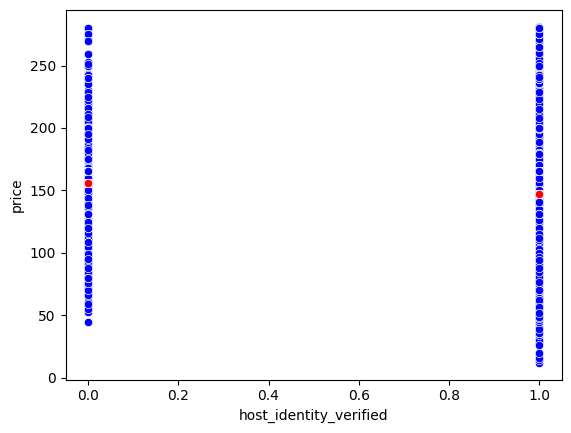

In [53]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='host_identity_verified', y='price', color='blue', data=ft_1)
sns.scatterplot(x='host_identity_verified', y='Predicciones_4', color='red', data=ft_1)

Grafico 5:

<Axes: xlabel='property_type', ylabel='price'>

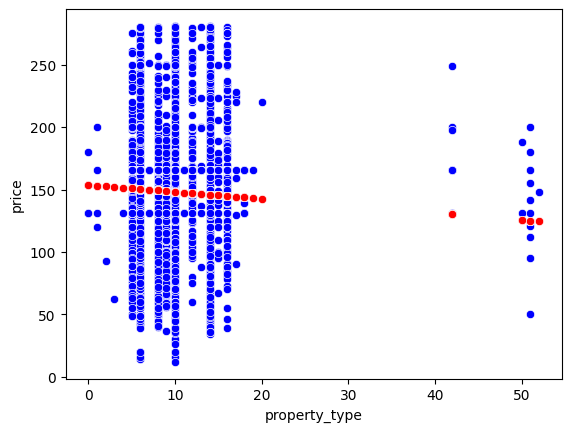

In [54]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='property_type', y='price', color='blue', data=ft_1)
sns.scatterplot(x='property_type', y='Predicciones_5', color='red', data=ft_1)

Grafico 6:

<Axes: xlabel='instant_bookable', ylabel='price'>

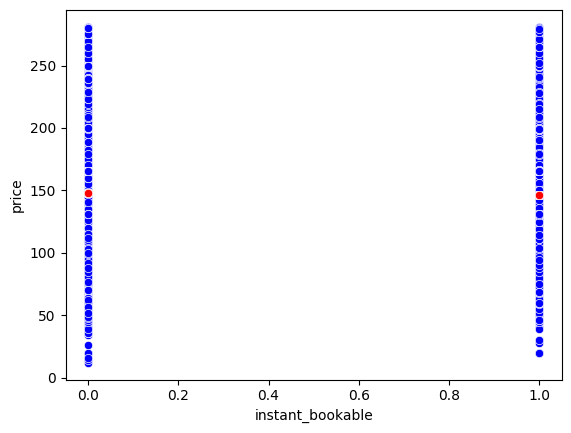

In [55]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='instant_bookable', y='price', color='blue', data=ft_1)
sns.scatterplot(x='instant_bookable', y='Predicciones_6', color='red', data=ft_1)

Grafico 7:

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

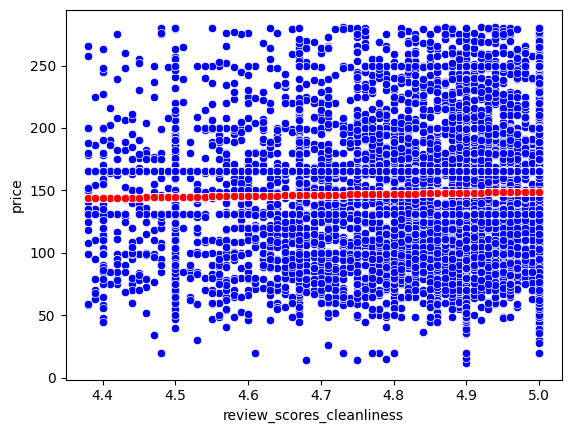

In [56]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='review_scores_cleanliness', y='price', color='blue', data=ft_1)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones_7', color='red', data=ft_1)

Grafico 8:

<Axes: xlabel='bathrooms', ylabel='accommodates'>

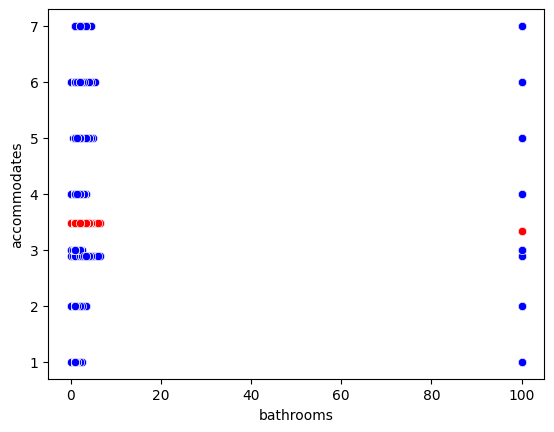

In [57]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='bathrooms', y='accommodates', color='blue', data=ft_1)
sns.scatterplot(x='bathrooms', y='Predicciones_8', color='red', data=ft_1)

Obtenemos los coeficientes de determinación 

In [58]:
#Modelo 1
coef_Deter_T = model_T.score(X = Var_Indep_T, y = Var_Dep_T)
coef_Deter_T

0.010131710168480912

In [59]:
#Modelo 2
coef_Deter_T2 = model_T2.score(X = Var_Indep_T2, y = Var_Dep_T)
coef_Deter_T2

0.0012600991392721639

In [60]:
#Modelo 3
coef_Deter_T3 = model_T3.score(X = Var_Indep_T3, y = Var_Dep_T)
coef_Deter_T3

0.0

In [61]:
#Modelo 4
coef_Deter_T4 = model_T4.score(X = Var_Indep_T4, y = Var_Dep_T)
coef_Deter_T4

0.0029403654385516953

In [62]:
#Modelo 5
coef_Deter_T5 = model_T5.score(X = Var_Indep_T5, y = Var_Dep_T)
coef_Deter_T5

0.002087353880730225

In [63]:
#Modelo 6
coef_Deter_T6 = model_T6.score(X = Var_Indep_T6, y = Var_Dep_T)
coef_Deter_T6

0.00033010944115985374

In [64]:
#Modelo 7
coef_Deter_T7 = model_T7.score(X = Var_Indep_T7, y = Var_Dep_T)
coef_Deter_T7

0.0006532278745239317

In [65]:
#Modelo 8
coef_Deter_T8 = model_T8.score(X = Var_Indep_T8, y = Var_Dep_T2)
coef_Deter_T8

0.0019526470075491575

Obtenemos los coeficientes de correlación 

In [66]:
#Modelo 1
coef_Correl_T =np.sqrt(coef_Deter_T)
coef_Correl_T

0.10065639656018345

In [67]:
#Modelo 2
coef_Correl_T2 = np.sqrt(coef_Deter_T2)
coef_Correl_T2

0.035497875137424265

In [68]:
#Modelo 3
coef_Correl_T3 = np.sqrt(coef_Deter_T2)
coef_Correl_T3

0.035497875137424265

In [69]:
#Modelo 4
coef_Correl_T4 = np.sqrt(coef_Deter_T4)
coef_Correl_T4

0.05422513659320459

In [70]:
#Modelo 5
coef_Correl_T5 = np.sqrt(coef_Deter_T5)
coef_Correl_T5

0.04568756812011584

In [71]:
#Modelo 6
coef_Correl_T6 = np.sqrt(coef_Deter_T6)
coef_Correl_T6

0.01816891414366455

In [72]:
#Modelo 7
coef_Correl_T7 = np.sqrt(coef_Deter_T7)
coef_Correl_T7

0.0255583229990532

In [73]:
#Modelo 8
coef_Correl_T8 = np.sqrt(coef_Deter_T8)
coef_Correl_T8

0.044188765625995455

Graficar todas las dispersiones entre todas las variables

c:\Users\Paulina\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Paulina\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Paulina\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Paulina\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: Futur

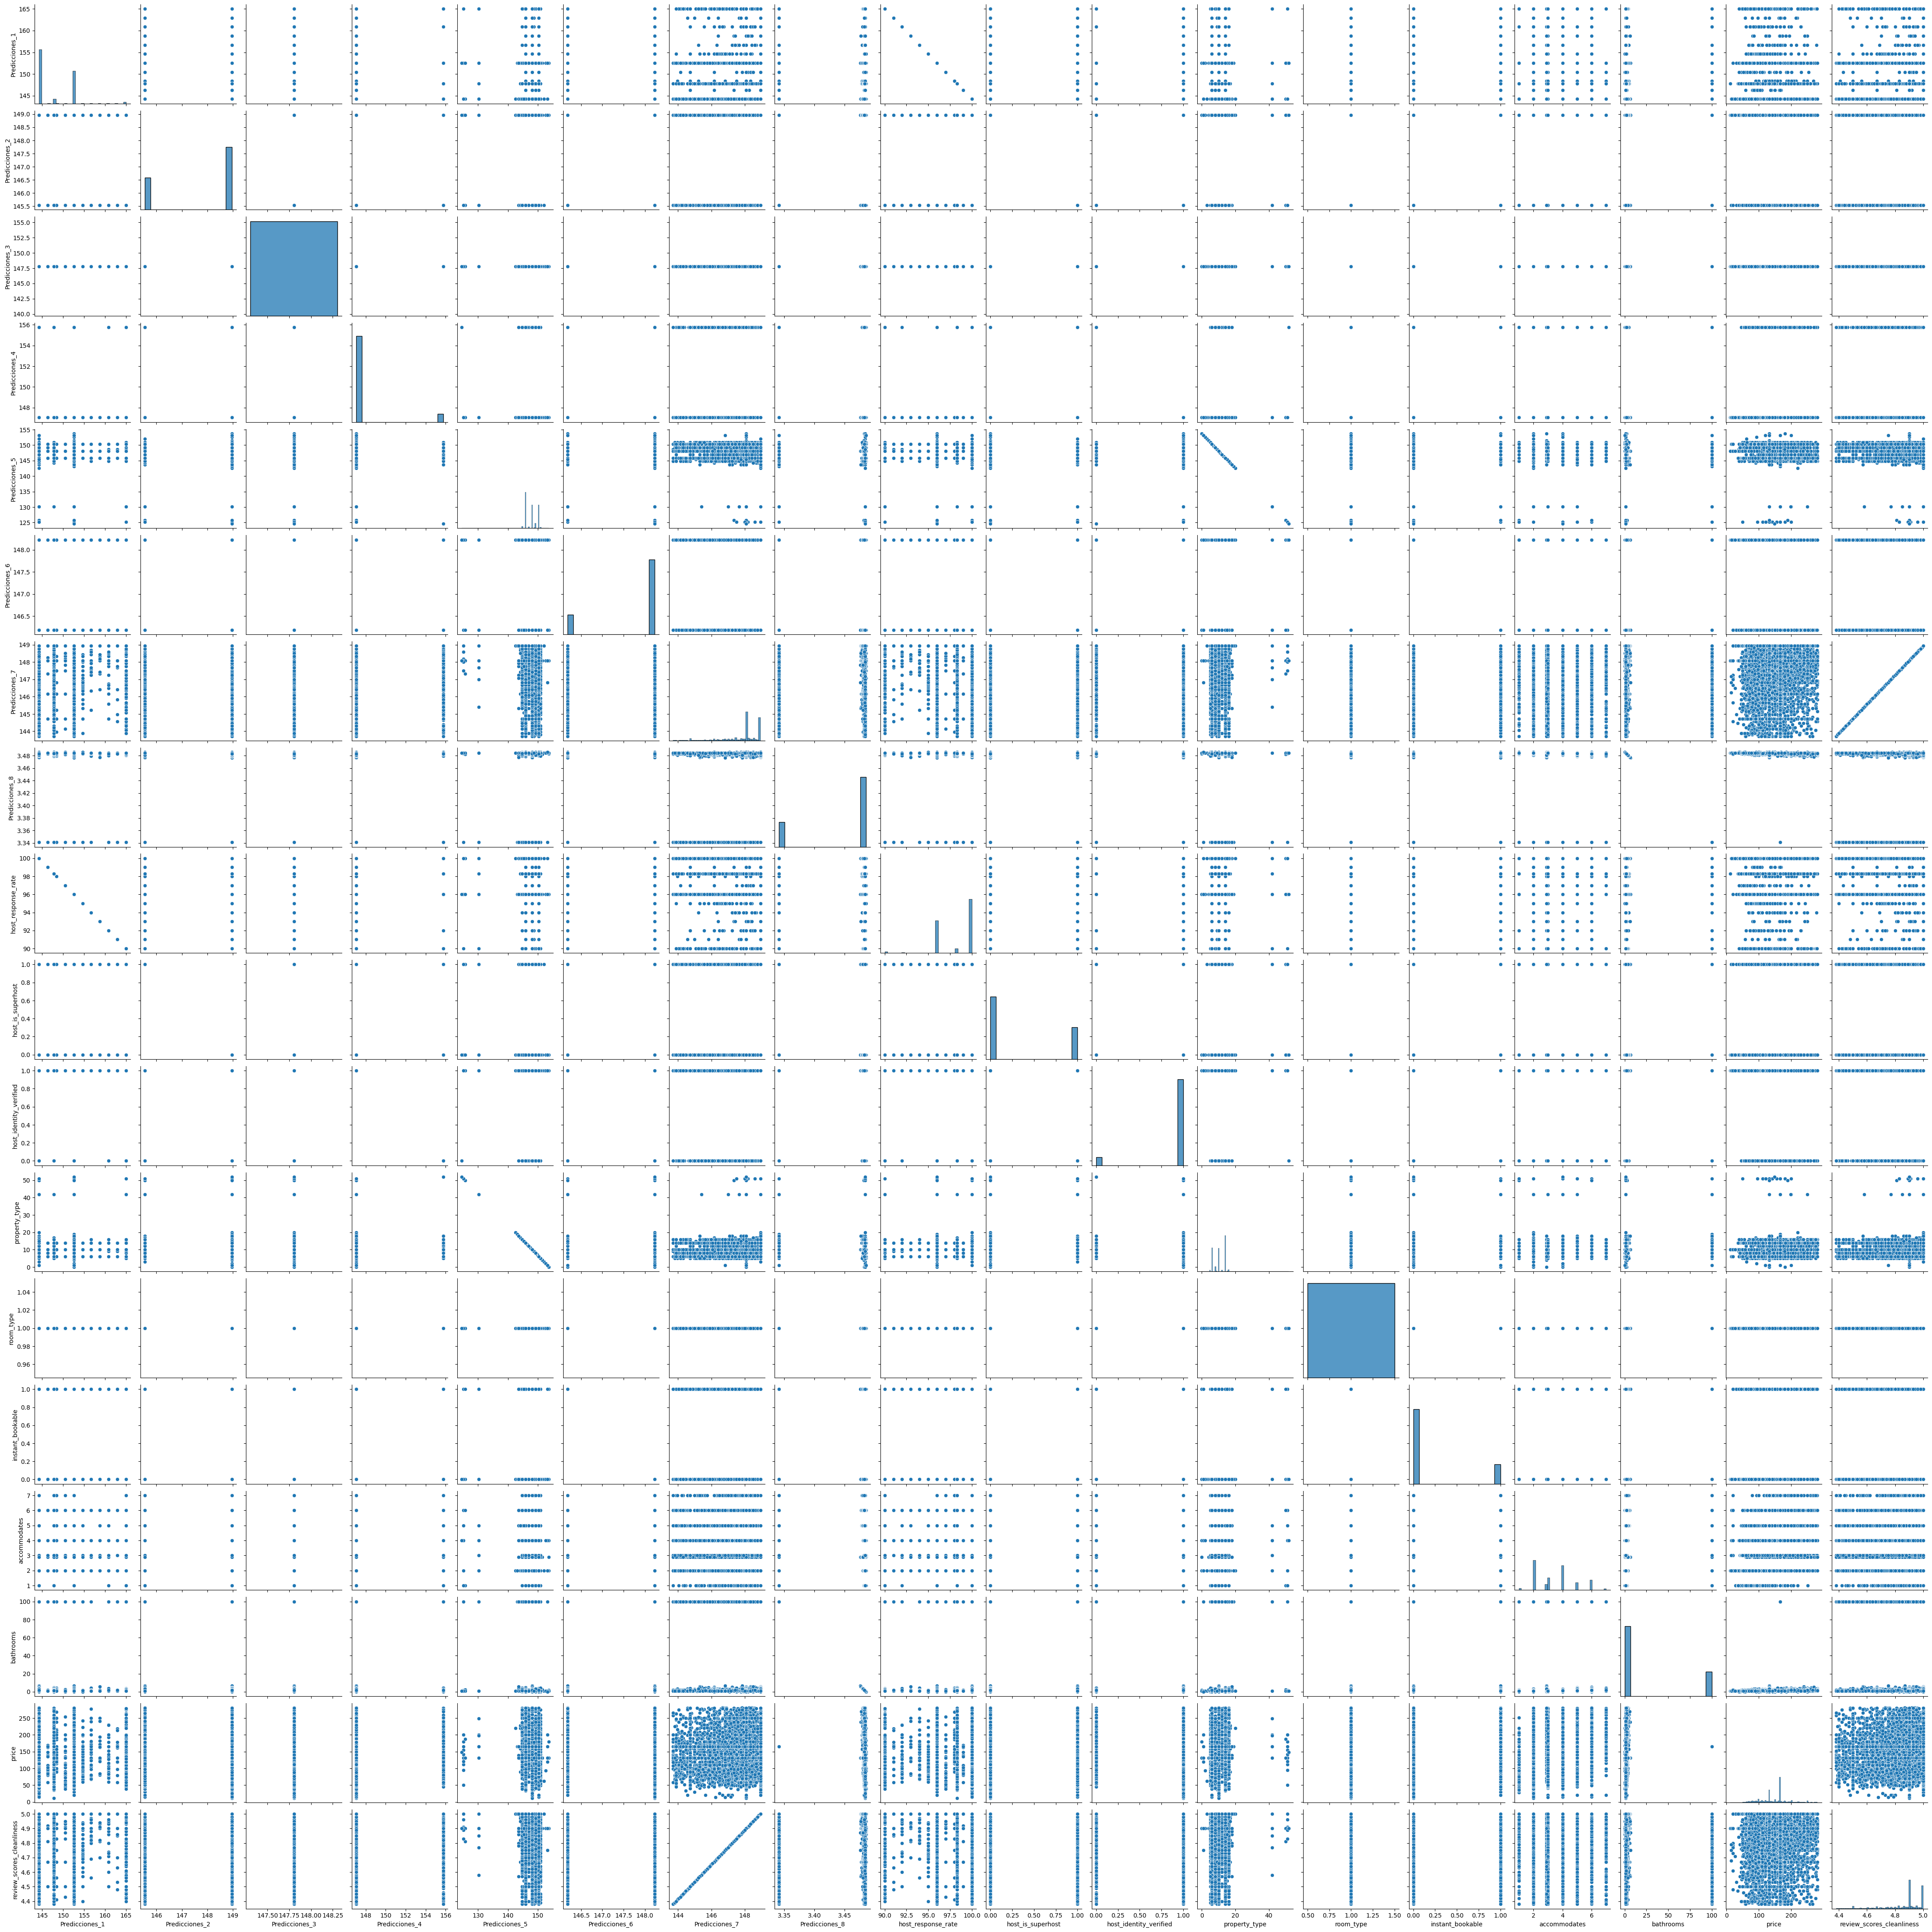

In [74]:
sns.pairplot(ft_1)

Encontrar las correlaciones 

In [75]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors_T = ft_1.corr()
Corr_Factors_T

Predicciones_1  Predicciones_2  Predicciones_3  \
Predicciones_1                   1.000000        0.377190             NaN   
Predicciones_2                   0.377190        1.000000             NaN   
Predicciones_3                        NaN             NaN             NaN   
Predicciones_4                   0.170679        0.150112             NaN   
Predicciones_5                  -0.037789       -0.028124             NaN   
Predicciones_6                   0.045414       -0.024326             NaN   
Predicciones_7                   0.000368       -0.072943             NaN   
Predicciones_8                  -0.358342       -0.243950             NaN   
host_response_rate              -1.000000       -0.377190             NaN   
host_is_superhost               -0.377190       -1.000000             NaN   
host_identity_verified          -0.170679       -0.150112             NaN   
property_type                    0.037789        0.028124             NaN   
room_type                             NaN             NaN             NaN   
instant_bookable                -0.045414        0.024326             NaN   
accommodates                    -0.051589       -0.004799             NaN   
bathrooms                        0.358342        0.243950             NaN   
price                            0.100656        0.035498             NaN   
review_scores_cleanliness        0.000368       -0.072943             NaN   

                           Predicciones_4  Predicciones_5  Predicciones_6  \
Predicciones_1                   0.170679       -0.037789        0.045414   
Predicciones_2                   0.150112       -0.028124       -0.024326   
Predicciones_3                        NaN             NaN             NaN   
Predicciones_4                   1.000000       -0.007610        0.048505   
Predicciones_5                  -0.007610        1.000000        0.067799   
Predicciones_6                   0.048505        0.067799        1.000000   
Predicciones_7                   0.042911       -0.033130        0.019061   
Predicciones_8                  -0.207856        0.010561       -0.052549   
host_response_rate              -0.170679        0.037789       -0.045414   
host_is_superhost               -0.150112        0.028124        0.024326   
host_identity_verified          -1.000000        0.007610       -0.048505   
property_type                    0.007610       -1.000000       -0.067799   
room_type                             NaN             NaN             NaN   
instant_bookable                -0.048505       -0.067799       -1.000000   
accommodates                    -0.033868        0.052355       -0.083946   
bathrooms                        0.207856       -0.010561        0.052549   
price                            0.054225        0.045688        0.018169   
review_scores_cleanliness        0.042911       -0.033130        0.019061   

                           Predicciones_7  Predicciones_8  host_response_rate  \
Predicciones_1                   0.000368       -0.358342           -1.000000   
Predicciones_2                  -0.072943       -0.243950           -0.377190   
Predicciones_3                        NaN             NaN                 NaN   
Predicciones_4                   0.042911       -0.207856           -0.170679   
Predicciones_5                  -0.033130        0.010561            0.037789   
Predicciones_6                   0.019061       -0.052549           -0.045414   
Predicciones_7                   1.000000        0.009781           -0.000368   
Predicciones_8                   0.009781        1.000000            0.358342   
host_response_rate              -0.000368        0.358342            1.000000   
host_is_superhost                0.072943        0.243950            0.377190   
host_identity_verified          -0.042911        0.207856            0.170679   
property_type                    0.033130       -0.010561           -0.037789   
room_type                             NaN     

In [76]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors_T1 = abs(Corr_Factors_T)
Corr_Factors_T1

Predicciones_1  Predicciones_2  Predicciones_3  \
Predicciones_1                   1.000000        0.377190             NaN   
Predicciones_2                   0.377190        1.000000             NaN   
Predicciones_3                        NaN             NaN             NaN   
Predicciones_4                   0.170679        0.150112             NaN   
Predicciones_5                   0.037789        0.028124             NaN   
Predicciones_6                   0.045414        0.024326             NaN   
Predicciones_7                   0.000368        0.072943             NaN   
Predicciones_8                   0.358342        0.243950             NaN   
host_response_rate               1.000000        0.377190             NaN   
host_is_superhost                0.377190        1.000000             NaN   
host_identity_verified           0.170679        0.150112             NaN   
property_type                    0.037789        0.028124             NaN   
room_type                             NaN             NaN             NaN   
instant_bookable                 0.045414        0.024326             NaN   
accommodates                     0.051589        0.004799             NaN   
bathrooms                        0.358342        0.243950             NaN   
price                            0.100656        0.035498             NaN   
review_scores_cleanliness        0.000368        0.072943             NaN   

                           Predicciones_4  Predicciones_5  Predicciones_6  \
Predicciones_1                   0.170679        0.037789        0.045414   
Predicciones_2                   0.150112        0.028124        0.024326   
Predicciones_3                        NaN             NaN             NaN   
Predicciones_4                   1.000000        0.007610        0.048505   
Predicciones_5                   0.007610        1.000000        0.067799   
Predicciones_6                   0.048505        0.067799        1.000000   
Predicciones_7                   0.042911        0.033130        0.019061   
Predicciones_8                   0.207856        0.010561        0.052549   
host_response_rate               0.170679        0.037789        0.045414   
host_is_superhost                0.150112        0.028124        0.024326   
host_identity_verified           1.000000        0.007610        0.048505   
property_type                    0.007610        1.000000        0.067799   
room_type                             NaN             NaN             NaN   
instant_bookable                 0.048505        0.067799        1.000000   
accommodates                     0.033868        0.052355        0.083946   
bathrooms                        0.207856        0.010561        0.052549   
price                            0.054225        0.045688        0.018169   
review_scores_cleanliness        0.042911        0.033130        0.019061   

                           Predicciones_7  Predicciones_8  host_response_rate  \
Predicciones_1                   0.000368        0.358342            1.000000   
Predicciones_2                   0.072943        0.243950            0.377190   
Predicciones_3                        NaN             NaN                 NaN   
Predicciones_4                   0.042911        0.207856            0.170679   
Predicciones_5                   0.033130        0.010561            0.037789   
Predicciones_6                   0.019061        0.052549            0.045414   
Predicciones_7                   1.000000        0.009781            0.000368   
Predicciones_8                   0.009781        1.000000            0.358342   
host_response_rate               0.000368        0.358342            1.000000   
host_is_superhost                0.072943        0.243950            0.377190   
host_identity_verified           0.042911        0.207856            0.170679   
property_type                    0.033130        0.010561            0.037789   
room_type                             NaN     

<Axes: >

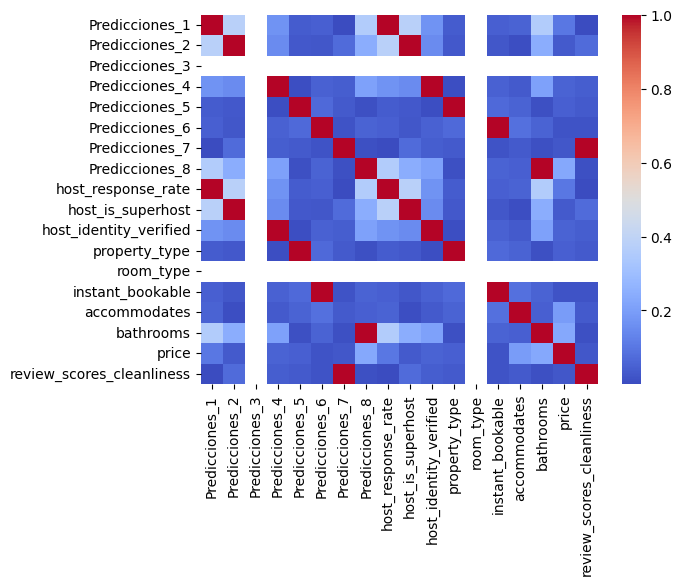

In [77]:
#Graficamos el mapa de calor de las coeficientes de correlación 
Heart_Nap_T = sns.heatmap(Corr_Factors_T1, cmap= 'coolwarm')
Heart_Nap_T

c:\Users\Paulina\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

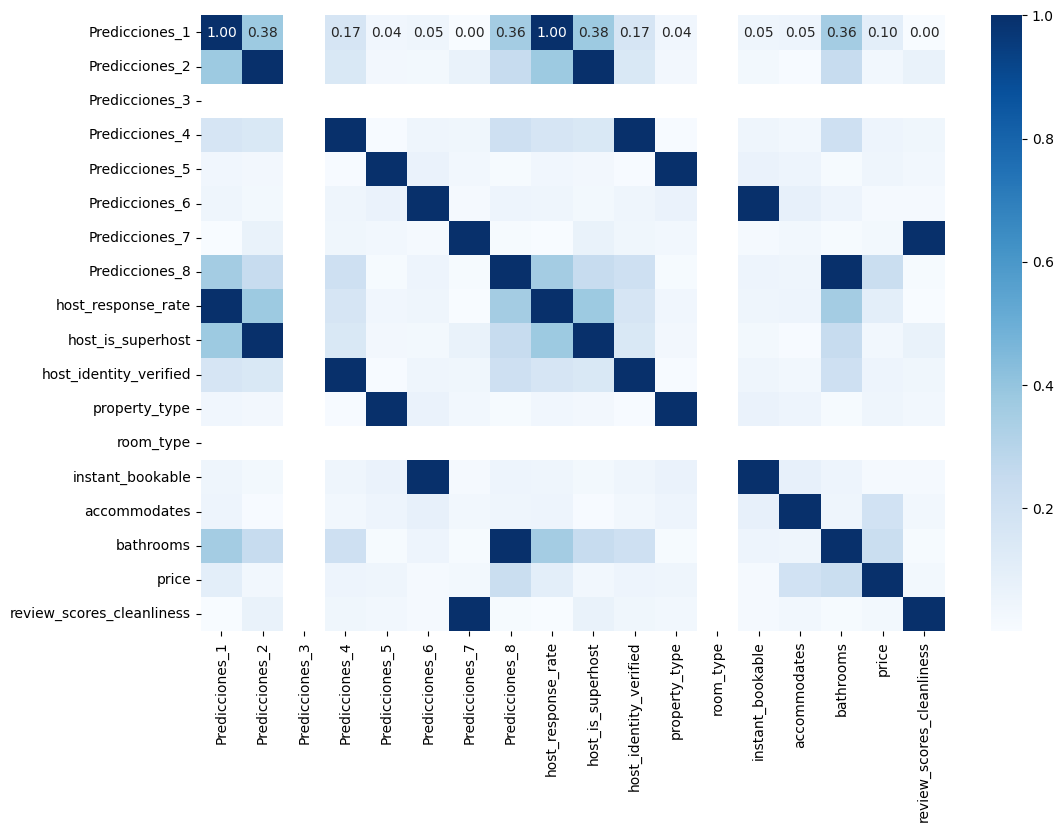

In [78]:
#Ajustamos el mapa de calor de las coeficientes de correlación 
plt.figure(figsize=(12,8))
Heart_Nap_T2 = sns.heatmap(Corr_Factors_T1, cmap= 'Blues', annot=True, fmt=".2f")
Heart_Nap_T2